# Some imports and helper code

In [1]:
import pickle
import seaborn
import numpy as np
import pandas as pd
import scipy as sci
import networkx as nx
import matplotlib.pylab as plt
from threat_model import Threat_Model
np.random.seed(1)

%matplotlib inline 
%load_ext autoreload

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

In [113]:
def plot_results(results, alphas):
    plt.figure()
    results[['lambda', 'lambda_sub', 'centrality']].plot(kind='line')
    plt.xlabel('iterations')
    title_template = r'$\alpha_1={:.2f}, \alpha_2={:.2f}, \alpha_3={:.2f}$'
    plt.title(title_template.format(*alphas))
    
    
def plot_adj_matrices(A, attacked_A):
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(A, cmap='hot')
    axes[0].set_title('before attack')
    axes[1].imshow(attacked_A, cmap='hot')
    axes[1].set_title('after attack')

In [13]:
graph_type = 'Stoc-Block'
with open('../result/{}_30-10-60_numExp_100.p'.format(graph_type), 'rb') as fid:
    data = pickle.load(fid)
# data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'budget'], dtype=np.float32)
data_f = pd.DataFrame(data, columns=['lambda1_S', 'centrality', 'utility', 'S_size', \
                                     'Avg. Degree', 'G_size', 'is_detected', 'budget'], dtype=np.float32)
# data_f['u/a'] = data_f['utility'] / data_f['budget']

False

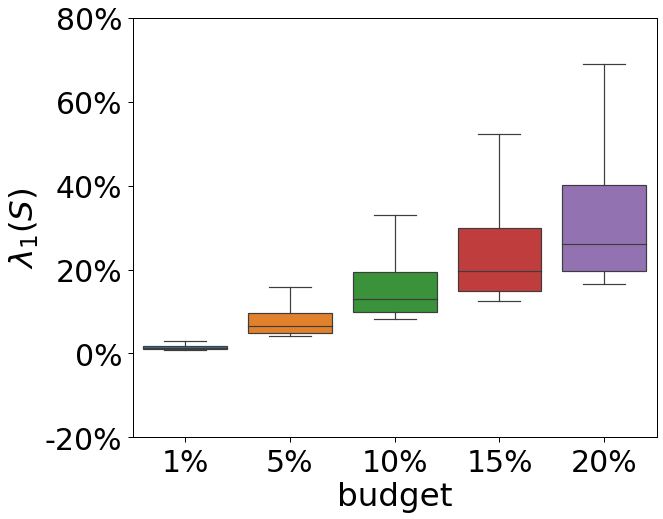

In [14]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='lambda1_S', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\lambda_1(S)$')
plt.xlabel('budget')
plt.tight_layout()
# plt.title("% of increases $\lambda_1(S)$ - {}".format(graph_type))
# plt.savefig('../result/figure/{}_lambda1S_30-10-60_numExp_100.pdf'.format(graph_type))

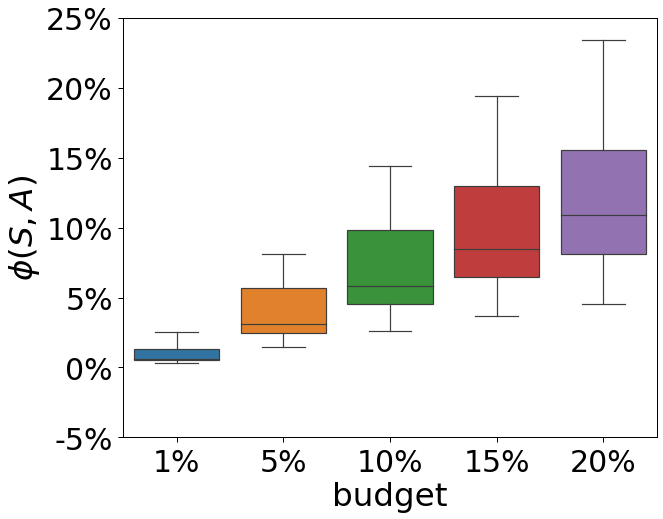

In [15]:
seaborn.set_context('paper', font_scale=3.4)
plt.subplots(figsize=(10, 8))
ax = seaborn.boxplot(x='budget', y='centrality', data=data_f, orient='v', showfliers=False)
plt.xticks(range(5), ['1%', '5%', '10%', '15%', '20%'])
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.ylabel('$\phi(S, A)$')
plt.tight_layout()
# plt.title("% of increases cut(S) - {}".format(graph_type))
# plt.savefig('../result/figure/{}_cut_30-10-60_numExp_100.pdf'.format(graph_type))

In [110]:
sci.stats.pearsonr(data_f['centrality'], data_f['S_size'])

(-0.5895085322338209, 8.647509324344682e-25)

In [13]:
data_f.groupby('budget')['utility'].mean() / data_f.groupby('budget')['budget'].mean()

budget
0.01    35.621109
0.05     7.730990
0.10     4.226565
0.15     3.054070
0.20     2.468457
dtype: float32

In [14]:
data_f.groupby('budget')['utility'].mean()

budget
0.01    0.356211
0.05    0.386550
0.10    0.422656
0.15    0.458111
0.20    0.493691
Name: utility, dtype: float32

In [5]:
d1 = data_f[data_f.centrality < 0]['S_size'] * data_f[data_f.centrality < 0]['Avg. Degree']
d2 = data_f[data_f.centrality >= 0]['S_size'] * data_f[data_f.centrality >= 0]['Avg. Degree']
print(sci.stats.ttest_ind(d1, d2))

Ttest_indResult(statistic=nan, pvalue=nan)


In [42]:
data_f[data_f.centrality >= 0]['S_size'].mean() * data_f[data_f.centrality < 0]['Avg. Degree'].mean()

219.89081

In [226]:
sci.stats.ttest_ind(data_f[data_f.lambda1_S < 0]['Avg. Degree'], data_f[data_f.lambda1_S >= 0]['Avg. Degree'])

Ttest_indResult(statistic=-7.204311264800589, pvalue=6.978838116882321e-12)

In [227]:
sci.stats.ttest_ind(data_f[data_f.lambda1_S < 0]['S_size'], data_f[data_f.lambda1_S >= 0]['S_size'])

Ttest_indResult(statistic=-8.641977324429579, pvalue=6.920009922266447e-16)

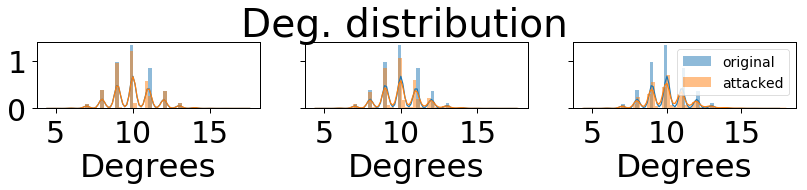

In [116]:
budget_to_string = {
    0.01: '1%',
    0.05: '5%',
    0.1:  '10%',
    0.15: '15%',
    0.2:  '20%'
}


graph_type = 'Small-World'

with open('../result/{}_30-10-60_numExp_50_Deg_distribution.p'.format(graph_type), 'rb') as fid:
    data = pickle.load(fid)
    

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
f.suptitle('Deg. distribution')
budget = 0.01
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax1)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax1)
ax1.set_xlabel('Degrees')
plt.tight_layout()


budget = 0.1
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax2)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax2)
ax2.set_xlabel('Degrees')
plt.tight_layout()


budget = 0.2
data_degs = data[budget]
# pVal = sci.stats.ttest_ind(data_degs['original'], data_degs['attacked'])[1]
seaborn.distplot(data_degs['original'], label='original', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax3)
seaborn.distplot(data_degs['attacked'], label='attacked', hist_kws={'alpha': 0.5}, norm_hist=True, ax=ax3)
ax3.set_xlabel('Degrees')
plt.tight_layout()
plt.legend(['original', 'attacked'], fontsize=14)

plt.savefig('../result/figure/Deg_dist_{}.pdf'.format(graph_type))

# print("Max % for Laplacian spectrum: {:.4f}%".format(100 * np.max(np.abs(data_eig['original'].iloc[1 :] - data_eig['attacked'].iloc[1:]) / np.abs(data_eig['original'].iloc[1:]))))
# print("T-test for degree distribution: ", pVal)

# # plot_adj_matrices(A, attacked_A)

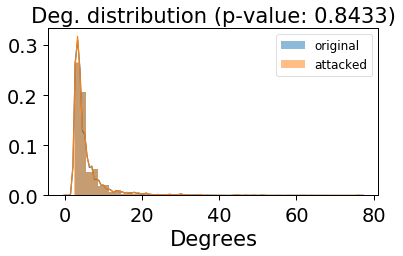

In [226]:
plt.figure()
seaborn.distplot(Deg_dist['original'], label='original', hist_kws={'alpha': 0.5})
seaborn.distplot(Deg_dist['attacked'], label='attacked', hist_kws={'alpha': 0.5})
plt.xlabel('Degrees')
plt.title('Deg. distribution (p-value: {:.4f})'.format(pVal))
plt.tight_layout()
plt.legend(['original', 'attacked'], fontsize=12)

In [41]:
G = nx.read_edgelist('../data/facebook_combined.txt', nodetype=int)
Degs = dict(G.degree())
maxDeg = max(list(Degs.values()))
avgDeg = np.mean(list(Degs.values()))
cc_target = 0.95
gcc = nx.average_clustering(G)